## Генеративные сети

#### Про задачу

**MAGIC – Major Atmospheric Gamma Imaging Cherenkov Telescope**

MAGIC (Major Atmospheric Gamma Imaging Cherenkov) - система, состоящая из двух черенковских телескопов диаметром 17 м. Они предназначены для наблюдения гамма-лучей от галактических и внегалактических источников в диапазоне очень высоких энергий (от 30 ГэВ до 100 ТэВ).

MAGIC позволил открыть и исследовать новые классы источников гамма-излучения, таких как, например, пульсары и гамма-всплески (GRB).

<center><img src="images/magic.jpg" width="1000"></center>

Источник: https://magic.mpp.mpg.de/

Youtube video: https://youtu.be/mjcDSR2vSU8

**Частицы из космоса**

Космические частицы, $\gamma$-кванты (фотоны) и адроны (протоны), взаимодействуют с атмосферой и порождают ливни вторичных частиц. Двигаясь с околосветовой скоростью, эти частицы излучают Черенковское излучение. Телескопы фотографируют это излучение. По фотографиям можно определить тип частицы из космоса: фотон или протон.

<center><img src="images/shower.jpg" width="500"></center>

**Фотографии**

Задача атмосферного черенковского телескопа - получить изображение ливня путем измерения черенковского света от частиц ливня. Это изображение представляет собой геометрическую проекцию ливня на детектор. Для анализа этих изображений были введены параметры изображения или так называемые параметры Хилласа. Ниже пример такой фотографии.

<center><img src="images/geo.jpg" width="400"></center>

Итак, каждая фотография описывается набором параметров, которые считает телескоп.

**Фотоны vs адроны**

Изображения для $\gamma$-квантов (фотонов) и адронов (протонов) отличаются по форме кластеров. Астрономы используют модели машинного обучения для классификации этих изображений. Получение каждого такого изображения - дорогое удовольствие!

<center><img src="images/gamma_p.png" width="600"></center>

Для обучения моделей ученые искусственно генерируют такие изображения для каждого типа частиц с помощью сложных физических симуляторов.

Задача заключается в том, чтобы сгенерировать хорошие фотографии разных частиц и сэкономить деньги для ученых.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Данные

Данные телескопа MAGIC из UCI репозитория https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. Каждый объект в данных - параметры одного изображения кластера и метка этого кластера (фотон или адрон):

0. Length: major axis of ellipse [mm]
1. Width: minor axis of ellipse [mm]
2. Size: 10-log of sum of content of all pixels [in #phot]
3. Conc: ratio of sum of two highest pixels over fSize [ratio]
4. Conc1: ratio of highest pixel over fSize [ratio]
5. Asym: distance from highest pixel to center, projected onto major axis [mm]
6. M3Long: 3rd root of third moment along major axis [mm]
7. M3Trans: 3rd root of third moment along minor axis [mm]
8. Alpha: angle of major axis with vector to origin [deg]
9. Dist: distance from origin to center of ellipse [mm]
10. class: g,h # gamma (signal), hadron (background)

In [1]:
!wget 'https://github.com/aavalina/DL/raw/fa39c11321acc3c131d9af553a1a7bff4f0e7c57/05_GenerativeModels/data/magic%2Bgamma%2Btelescope.zip'

--2024-10-24 19:00:52--  https://github.com/aavalina/DL/raw/fa39c11321acc3c131d9af553a1a7bff4f0e7c57/05_GenerativeModels/data/magic%2Bgamma%2Btelescope.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aavalina/DL/fa39c11321acc3c131d9af553a1a7bff4f0e7c57/05_GenerativeModels/data/magic%2Bgamma%2Btelescope.zip [following]
--2024-10-24 19:00:52--  https://raw.githubusercontent.com/aavalina/DL/fa39c11321acc3c131d9af553a1a7bff4f0e7c57/05_GenerativeModels/data/magic%2Bgamma%2Btelescope.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 646639 (631K) [application/zip]
Saving to: ‘magic+gamma+telesco

In [2]:
!unzip 'magic+gamma+telescope.zip'

Archive:  magic+gamma+telescope.zip
  inflating: magic04.data            
  inflating: magic04.names           


In [5]:
# read data
names = np.array(
    [
        "Length",
        "Width",
        "Size",
        "Conc",
        "Conc1",
        "Asym",
        "M3Long",
        "M3Trans",
        "Alpha",
        "Dist",
        "class",
    ]
)
data = pd.read_csv("magic04.data", header=None)
data.columns = names
print(data.shape)
data.head()

(19020, 11)


,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


#### Постановка задачи

Задача заключается в том, чтобы с помощью генеративно-состязательных сетей научиться генерировать параметры кластеров на изображениях телескопа для каждого типа частиц (фотона или адрона):

- $X$ - матрица реальных объектов, которые нужно начиться генерировать;
- $y$ - метки классов, которые будем использовать как условие при генерации.

In [6]:
# параметры кластеров на изображениях
X = data[names[:-1]].values
X = np.abs(X)

# метки классов
labels = data[names[-1]].values
y = np.ones((len(labels), 1))
y[labels == "h"] = 0

In [7]:
# примеры
X[:2]

array([[2.87967e+01, 1.60021e+01, 2.64490e+00, 3.91800e-01, 1.98200e-01,
        2.77004e+01, 2.20110e+01, 8.20270e+00, 4.00920e+01, 8.18828e+01],
       [3.16036e+01, 1.17235e+01, 2.51850e+00, 5.30300e-01, 3.77300e-01,
        2.62722e+01, 2.38238e+01, 9.95740e+00, 6.36090e+00, 2.05261e+02]])

In [8]:
# примеры
y[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
# все возможные значения
np.unique(y)

array([0., 1.])

#### Визуализация данных

Каждое изображение описывается 10 параметрами. Построим распределения значений каждого параметра для каждого типа частиц.

In [10]:
def plot_hists(X1, X2, names, label1, label2, bins=np.linspace(-3, 3, 61)):
    plt.figure(figsize=(5 * 4, 5 * 2))
    for i in range(X1.shape[1]):
        plt.subplot(3, 4, i + 1)
        plt.grid()
        plt.hist(X1[:, i], bins=bins, alpha=0.3, label=label1, color="C4")
        plt.hist(X2[:, i], bins=bins, alpha=0.3, label=label2, color="C0")
        plt.xlabel(names[i], size=14)
        plt.legend(loc="best")
    plt.tight_layout()

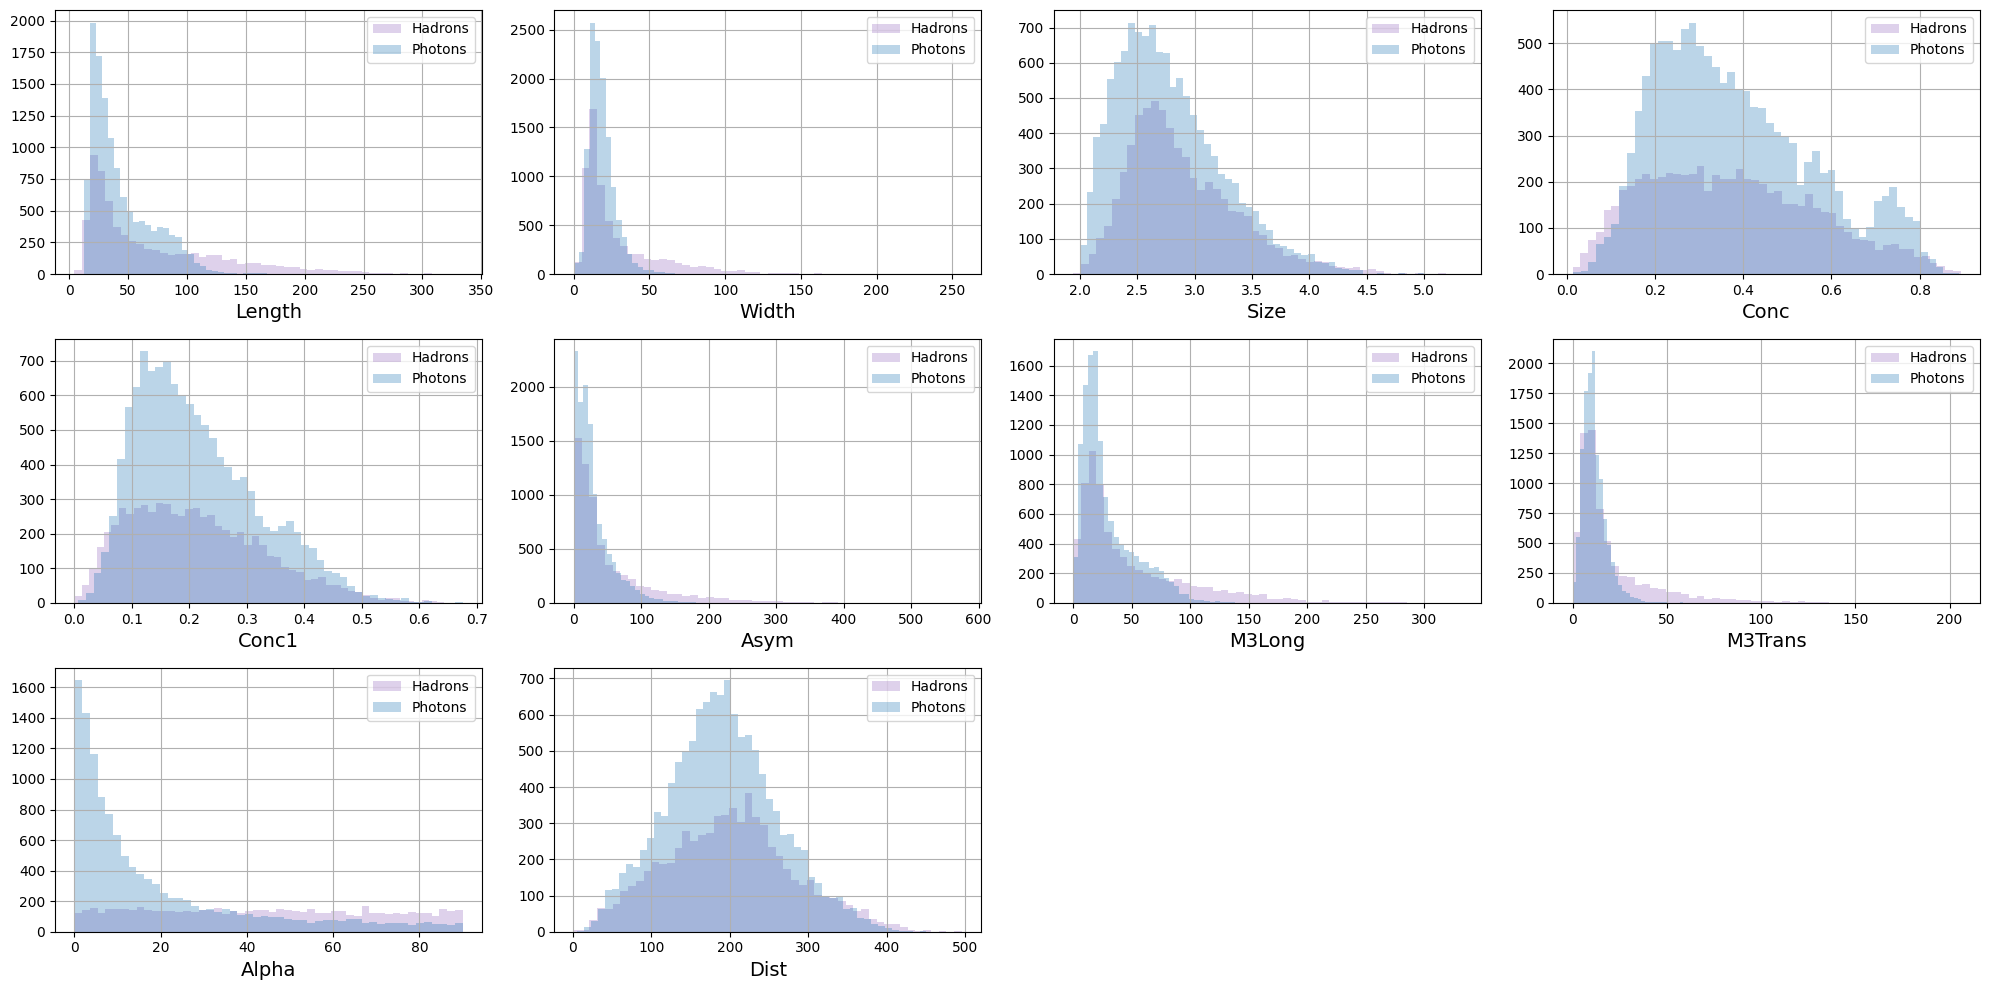

In [ ]:
plot_hists(
    X[y[:, 0] == 0], X[y[:, 0] == 1], names, label1="Hadrons", label2="Photons", bins=50
)

#### Предобработка данных

Из графика видно, что распределения для многих признаков имеют тяжелые хвосты. Это делает обучение генеративных моделей тяжелее. Поэтому нужно преобразовать данные, чтобы убрать эти тяжелые хвосты.

**Обучающая и тестовая выборки**

In [ ]:
from sklearn.model_selection import train_test_split

# train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.5, shuffle=True, random_state=11
)

**Преобразование входных данных**

Приведение распределения каждого параметра к нормальному при помощи [QuantileTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html).

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(random_state=11, output_distribution='normal')
X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

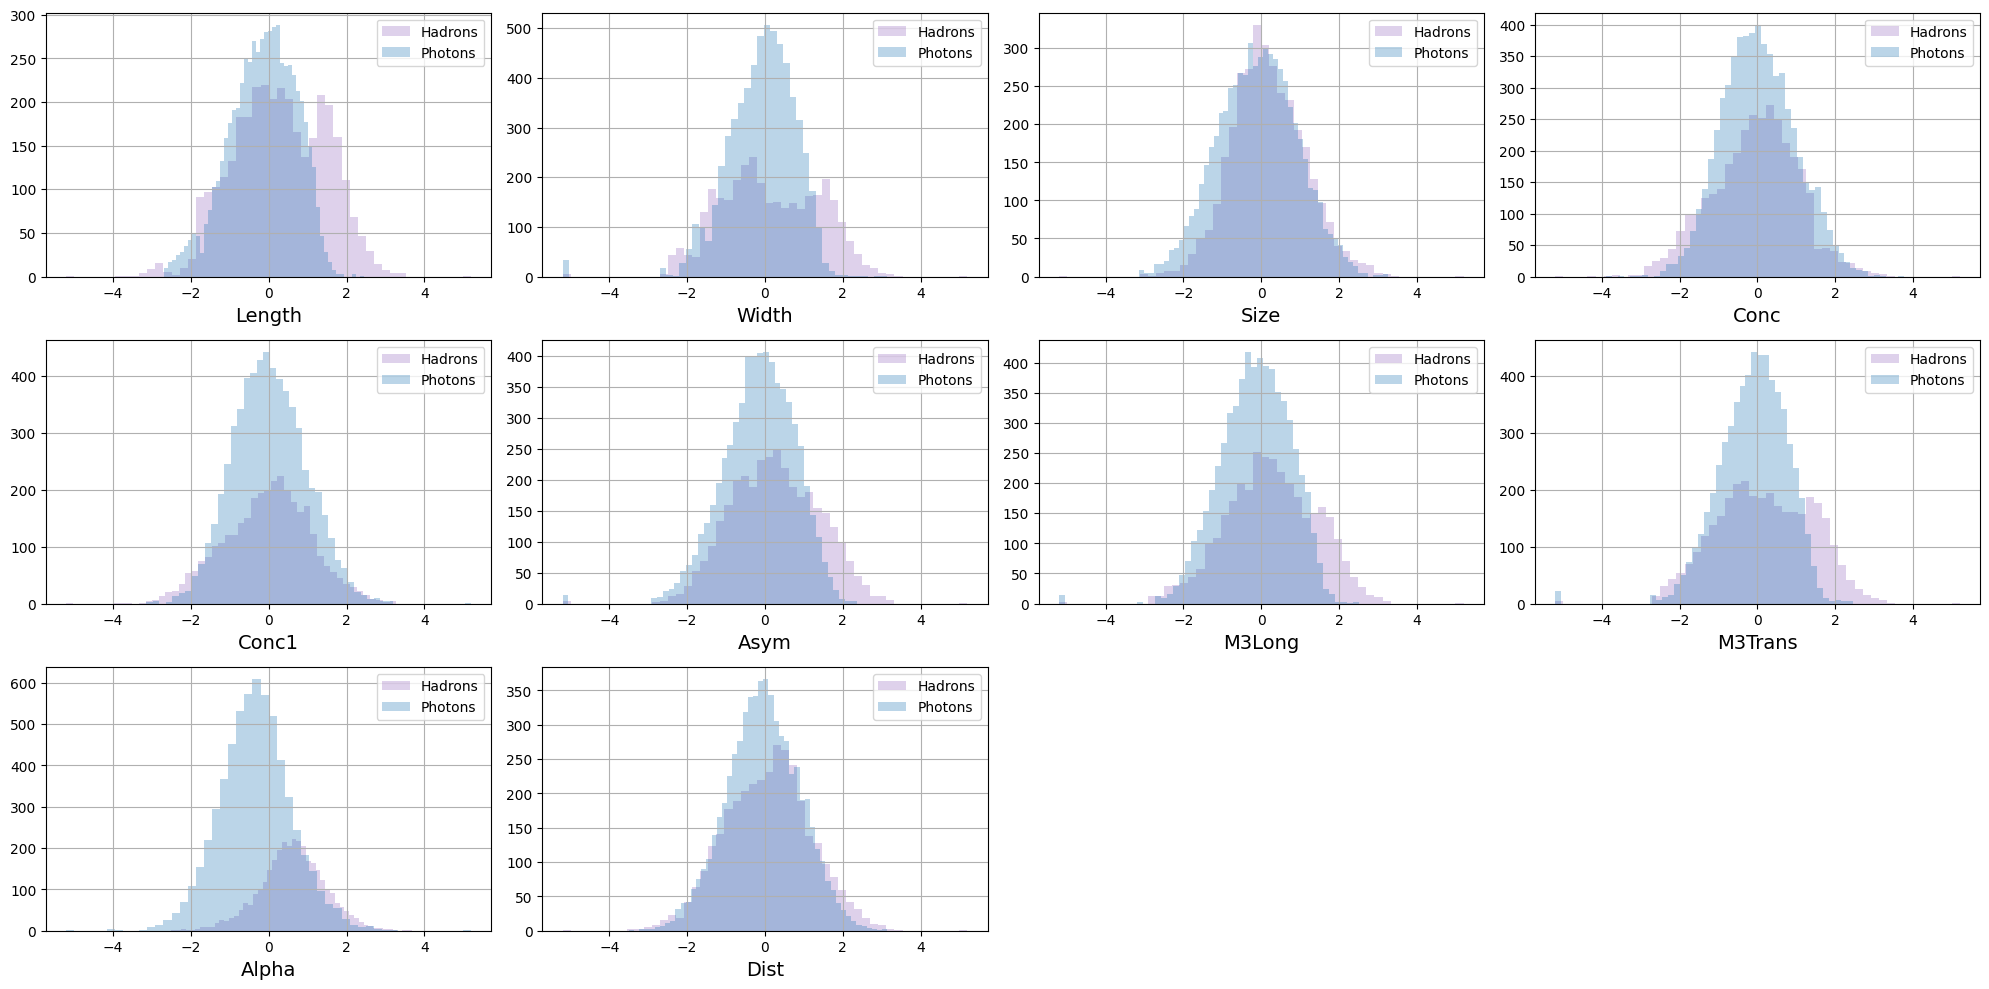

In [ ]:
plot_hists(
    X_train[y_train[:, 0] == 0],
    X_train[y_train[:, 0] == 1],
    names,
    label1="Hadrons",
    label2="Photons",
    bins=50,
)

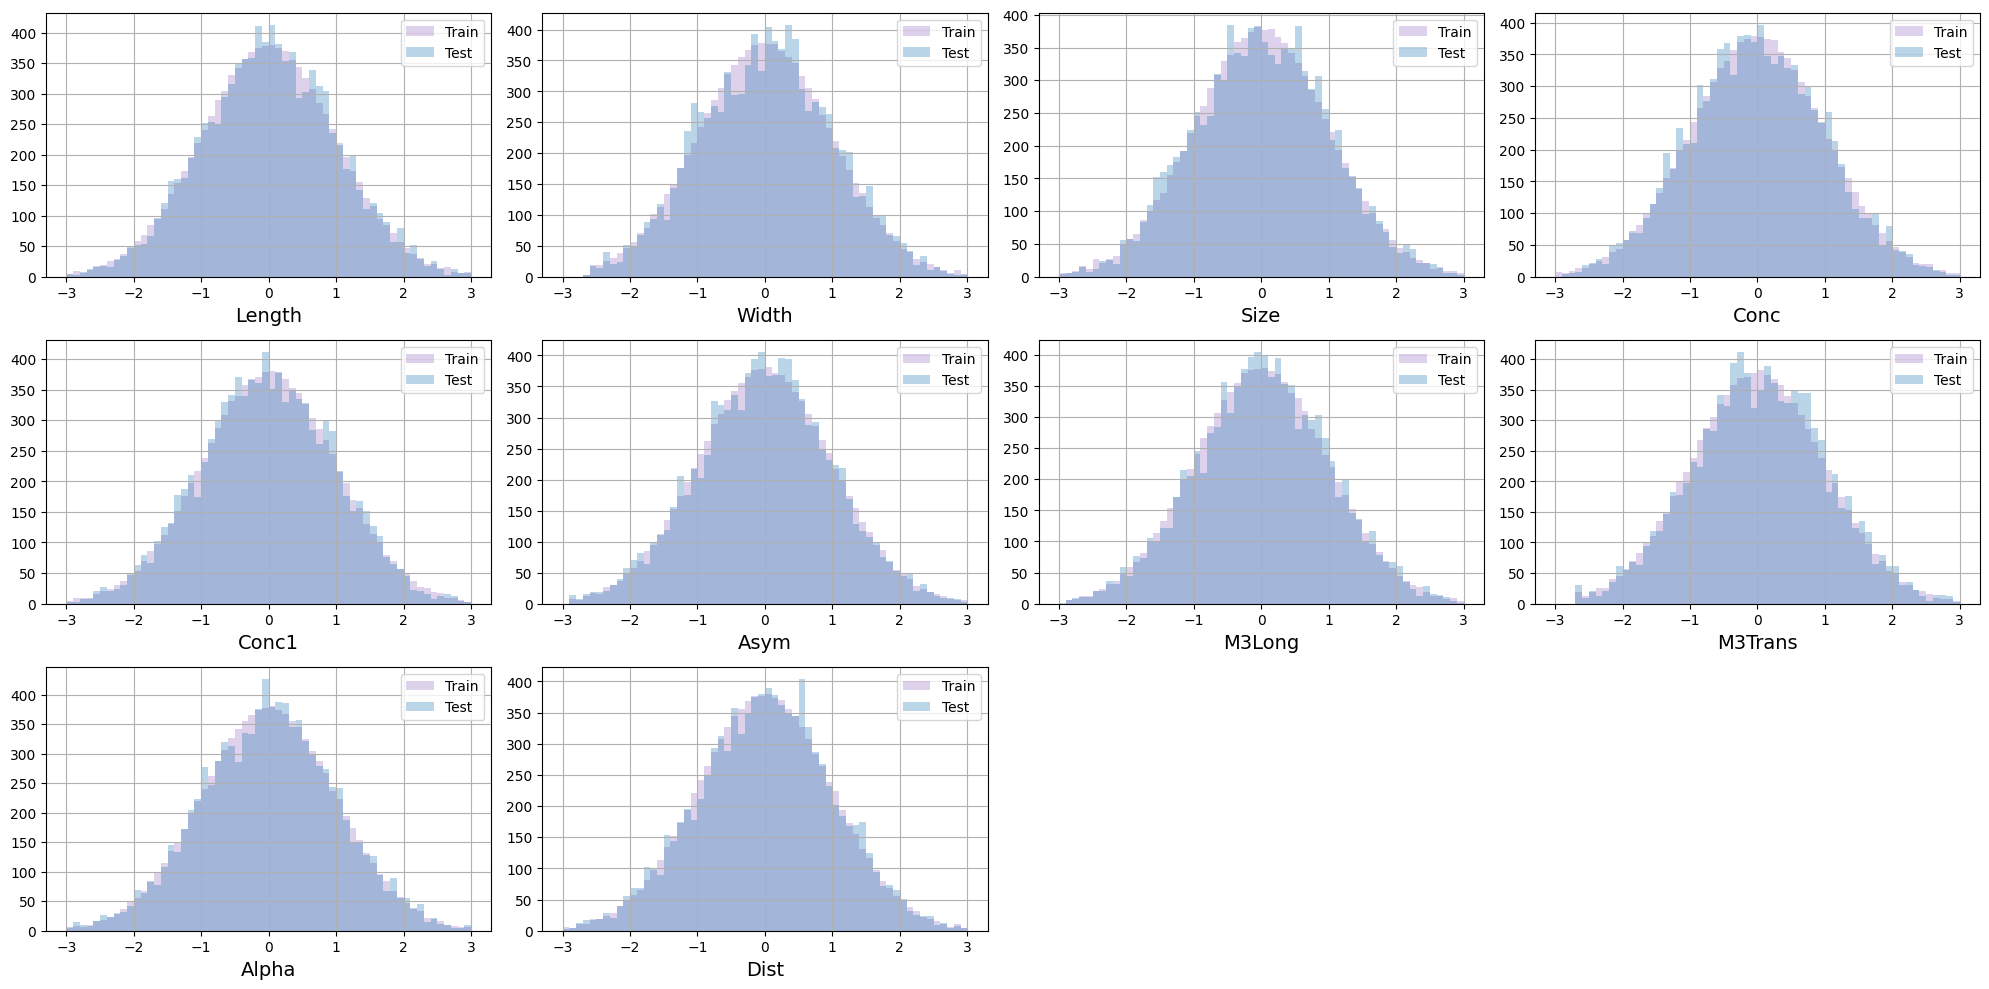

In [ ]:
plot_hists(X_train, X_test, names, label1="Train", label2="Test")

#### Conditional WGAN

Используем `Conditional WGAN` (рисунок). В качестве условия `y` используем метку класса: **0** - адрон, **1** - фотон. Таким образом, будем сообщать генератору для какой частицы нужно генерировать параметры изображения.

<center><img src="images/cgan.png" width="800"></center>

Генератор $\hat{x} = G(z, y)$ будет принимать на вход шумовой вектор $z$ и вектор условий $y$, а выдавать будет сгенерированный (фейковый) вектор параметров $\hat{x}$.

Дискриминатор $D(x, y)$ будет принимать на вход вектор параметров $x$ и вектор условий $y$, а возвращать будет рациональное число.

Функция потерь для обучения `Conditional WGAN`:

$$L(G, D) = -\frac{1}{n} \sum_{x_i \in X, y_i \in y} D(x_i, y_i)+\frac{1}{n} \sum_{z_i \in Z, y_i \in y} D(G(z_i, y_i), y_i) \to \max_G \min_D$$

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
DEVICE

device(type='cuda')

**Реализация нейронной сети для генератора**

Слои:
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функция активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функция активации;
- Выходной слой.

In [ ]:
class Generator(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(Generator, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(n_inputs, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, n_outputs),
        )

    def forward(self, z, y):
        zy = torch.cat((z, y), dim=1)
        return self.net(zy)

**Реализация функции для генерации новых объектов $X$ по вектору условий $y$.**

In [ ]:
def generate(generator, y, latent_dim):
    Z_noise = torch.normal(0, 1, (len(y), latent_dim)).to(DEVICE)
    y = torch.tensor(y, dtype=torch.float, device=DEVICE)
    with torch.no_grad():
      X_fake = generator(Z_noise, y).cpu().detach().numpy()
    return X_fake  # numpy

In [ ]:
latent_dim = 10
generator = Generator(n_inputs=latent_dim + y.shape[1], n_outputs=X_train.shape[1]).to(DEVICE)
generate(generator, y_train, latent_dim).shape

(9510, 10)

**Реализация нейронной сети для дискриминатора**

Слои:
- Полносвязный слой со 100 нейронами;
- ReLU функция активации;
- Полносвязный слой со 100 нейронами;
- ReLU функция активации;
- Выходной слой.

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, n_inputs):
        super(Discriminator, self).__init__()

        self.net = nn.Sequential(
           nn.Linear(n_inputs, 100),
           nn.ReLU(),
           nn.Linear(100, 100),
           nn.ReLU(),
           nn.Linear(100, 1), # обычно дискриминатор должен выдавать вероятность принадлежности сгенерированного вектора к классу, заданному условием, поэтому
           # используем сигмоиду, так как она переводит результат в отрезок [0, 1], но в данном случае мы предсказываем рациональное число,
           # на которое не накладываются никакие ограничения, поэтому и функция активации не нужна
        )

    def forward(self, x, y):
        xy = torch.cat((x, y), dim=1)
        return self.net(xy)

Реализация функции, которая принимает на вход набор сгенерированных и настоящих объектов, разбивает на train и test с учетом баланса классов (real и fake объектов), обучает модель логистической регрессии и градиентного бустинга (которые учатся отличать настоящие объекты от фальшивых), после чего выводит accuracy score на отложенной выборке у обоих моделей.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def other_agent_score(X_real, y_real, X_fake, y_fake):

    X = np.concatenate((X_real, X_fake), axis=0)
    y = np.concatenate((np.ones(y_real.shape[0]), np.zeros(y_fake.shape[0])), axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True, random_state=11)

    log_reg = LogisticRegression(random_state=11)
    log_reg.fit(X_train, y_train)

    boosting = GradientBoostingClassifier(random_state=11)
    boosting.fit(X_train, y_train)

    log_reg_score = accuracy_score(y_test, log_reg.predict(X_test))
    boosting_score = accuracy_score(y_test, boosting.predict(X_test))

    print("Linear regression score: " + str(log_reg_score))
    print("Boosting score: " + str(boosting_score))

Чем меньше accuracy score, тем лучше: нужно, чтобы классификаторы как можно хуже различали реальные и фейковые объекты, однако совсем низкий accuracy score (около 0) не подходит, так как это уже будет означать, что классификатор просто плохой сам по себе. Наиболее хорошим accuracy score является значение около 0.5 (все равно что случайно говорить принадлежит ли данный объект реальному или фейку).

**Реализация класса для обучения генеративной модели**

In [ ]:
class Fitter(object):
    def __init__(
        self,
        generator,
        discriminator,
        batch_size=32,
        n_epochs=10,
        latent_dim=1,
        lr=0.0001,
        n_critic=5, # число итераций обучения дискриминатора на одну итерацию обучения генератора
    ):

        self.generator = generator
        self.discriminator = discriminator
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr
        self.n_critic = n_critic

        self.opt_gen = torch.optim.RMSprop(self.generator.parameters(), lr=self.lr)
        self.opt_disc = torch.optim.RMSprop(self.discriminator.parameters(), lr=self.lr)

        self.generator.to(DEVICE)
        self.discriminator.to(DEVICE)

    def fit(self, X, y):

        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=DEVICE)
        y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)

        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)

        # Turn on training
        self.generator.train(True)
        self.discriminator.train(True)

        self.loss_history = []
        # self.gen_loss_history = []
        # self.disc_loss_history = []

        # Fit GAN
        for epoch in range(self.n_epochs):
            for i, (real_batch, cond_batch) in enumerate(
                DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)
            ):

                self.opt_disc.zero_grad()

                # генерация новых объектов
                batch_noise = torch.normal(0, 1, (len(real_batch), self.latent_dim)).to(DEVICE)
                gen_batch = self.generator(batch_noise, cond_batch)

                # скоры дискриминатора на реальных объектах
                real_validity = self.discriminator(real_batch, cond_batch)
                # скоры дискриминатора на фейковых объектах
                fake_validity = self.discriminator(gen_batch, cond_batch)

                # значение функции потерь дискриминатора
                d_loss_fake = torch.mean(fake_validity)
                d_loss_real = - torch.mean(real_validity)

                d_loss = d_loss_fake + d_loss_real
                d_loss.backward()

                self.opt_disc.step()

                # ограничение весов дискриминатора
                for p in self.discriminator.parameters():
                  p.data.clamp_(-0.01, 0.01)

                self.opt_gen.zero_grad()

                # обучение генератора каждые n_critic итераций
                if i % self.n_critic == 0:

                    # генерация новых объектов
                    batch_noise = torch.normal(0, 1, (len(real_batch), self.latent_dim)).to(DEVICE)
                    gen_batch = self.generator(batch_noise, cond_batch)

                    # скоры дискриминатора на фейковых объектах
                    fake_validity = self.discriminator(gen_batch, cond_batch)
                    # значение функции потерь генератора
                    g_loss = - torch.mean(fake_validity)

                    g_loss.backward()
                    self.opt_gen.step()

                    # self.gen_loss_history.append(g_loss.detach().cpu())
                    # self.disc_loss_history.append(d_loss.detach().cpu())

            # calculate and store loss after an epoch
            Z_noise = torch.normal(0, 1, (len(X_real), self.latent_dim)).to(DEVICE)
            X_fake = self.generator(Z_noise, y_cond)
            loss_epoch = torch.mean(self.discriminator(X_real, y_cond)) - torch.mean(
                self.discriminator(X_fake, y_cond)
            )
            self.loss_history.append(loss_epoch.detach().cpu())

            # создаем выборку из 1000 объектов из X_train и 1000 сгенерированных объектов и запускаем работу функции other_agent_score
            other_agent_score(X[:1000], y[:1000], X_fake[:1000].cpu().detach().numpy(), y[:1000])

        # Turn off training
        self.generator.train(False)
        self.discriminator.train(False)

<https://arxiv.org/pdf/1701.07875.pdf>.

**Обучение модели**

In [ ]:
%%time
latent_dim = 10
generator = Generator(n_inputs=latent_dim + y.shape[1], n_outputs=X_train.shape[1])
discriminator = Discriminator(n_inputs=X_train.shape[1] + y.shape[1])

fitter = Fitter(
    generator,
    discriminator,
    batch_size=50,
    n_epochs=100,
    latent_dim=latent_dim,
    lr=0.0001,
    n_critic=5,
)
fitter.fit(X_train, y_train)

Linear regression score: 0.58
Boosting score: 0.892
Linear regression score: 0.55
Boosting score: 0.872
Linear regression score: 0.588
Boosting score: 0.82
Linear regression score: 0.536
Boosting score: 0.794
Linear regression score: 0.538
Boosting score: 0.744
Linear regression score: 0.506
Boosting score: 0.678
Linear regression score: 0.532
Boosting score: 0.662
Linear regression score: 0.54
Boosting score: 0.708
Linear regression score: 0.49
Boosting score: 0.704
Linear regression score: 0.498
Boosting score: 0.69
Linear regression score: 0.52
Boosting score: 0.674
Linear regression score: 0.468
Boosting score: 0.662
Linear regression score: 0.54
Boosting score: 0.674
Linear regression score: 0.522
Boosting score: 0.7
Linear regression score: 0.492
Boosting score: 0.696
Linear regression score: 0.5
Boosting score: 0.7
Linear regression score: 0.516
Boosting score: 0.678
Linear regression score: 0.508
Boosting score: 0.66
Linear regression score: 0.498
Boosting score: 0.674
Linear r

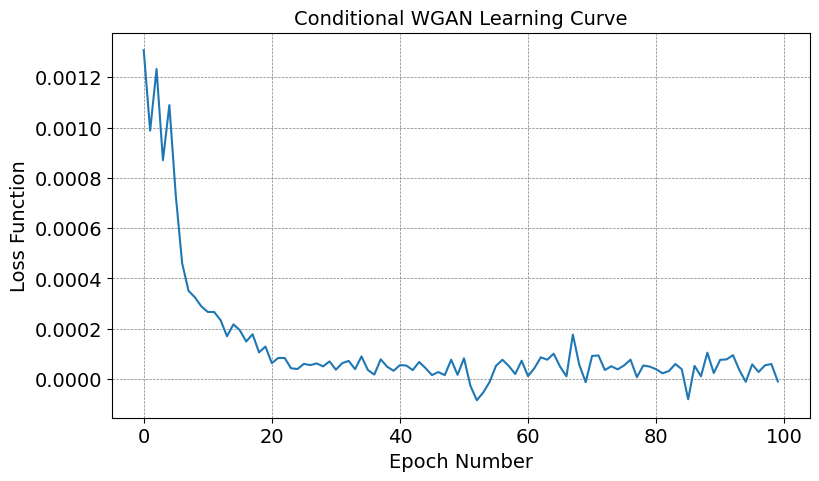

In [ ]:
# WGAN learning curve
plt.figure(figsize=(9, 5))
plt.plot(fitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional WGAN Learning Curve", size=14)
plt.grid(visible=1, linestyle="--", linewidth=0.5, color="0.5")
plt.show()

In [ ]:
# посмотреть на лоссы дискриминатора и генератора отдельно
# plt.figure(figsize=(9, 5))
# plt.plot(fitter.gen_loss_history)
# plt.plot(fitter.disc_loss_history)
# plt.xlabel("Epoch Number", size=14)
# plt.ylabel("Loss Function", size=14)
# plt.xticks(size=14)
# plt.yticks(size=14)
# plt.title("Conditional WGAN Learning Curve", size=14)
# plt.grid(visible=1, linestyle="--", linewidth=0.5, color="0.5")
# plt.show()

Теперь сгенерируем фейковые матрицы `X_fake_train` и `X_fake_test`. Сравним их с матрицами реальных объектов `X_train` и `X_test`.

In [ ]:
X_train = qt.inverse_transform(X_train) # обратное квантильное преобразование исходных данных
X_test = qt.inverse_transform(X_test)

In [ ]:
X_fake_train = generate(fitter.generator, y_train, latent_dim)
X_fake_train = qt.inverse_transform(X_fake_train) # обратное квантильное преобразование сгенерированных данных

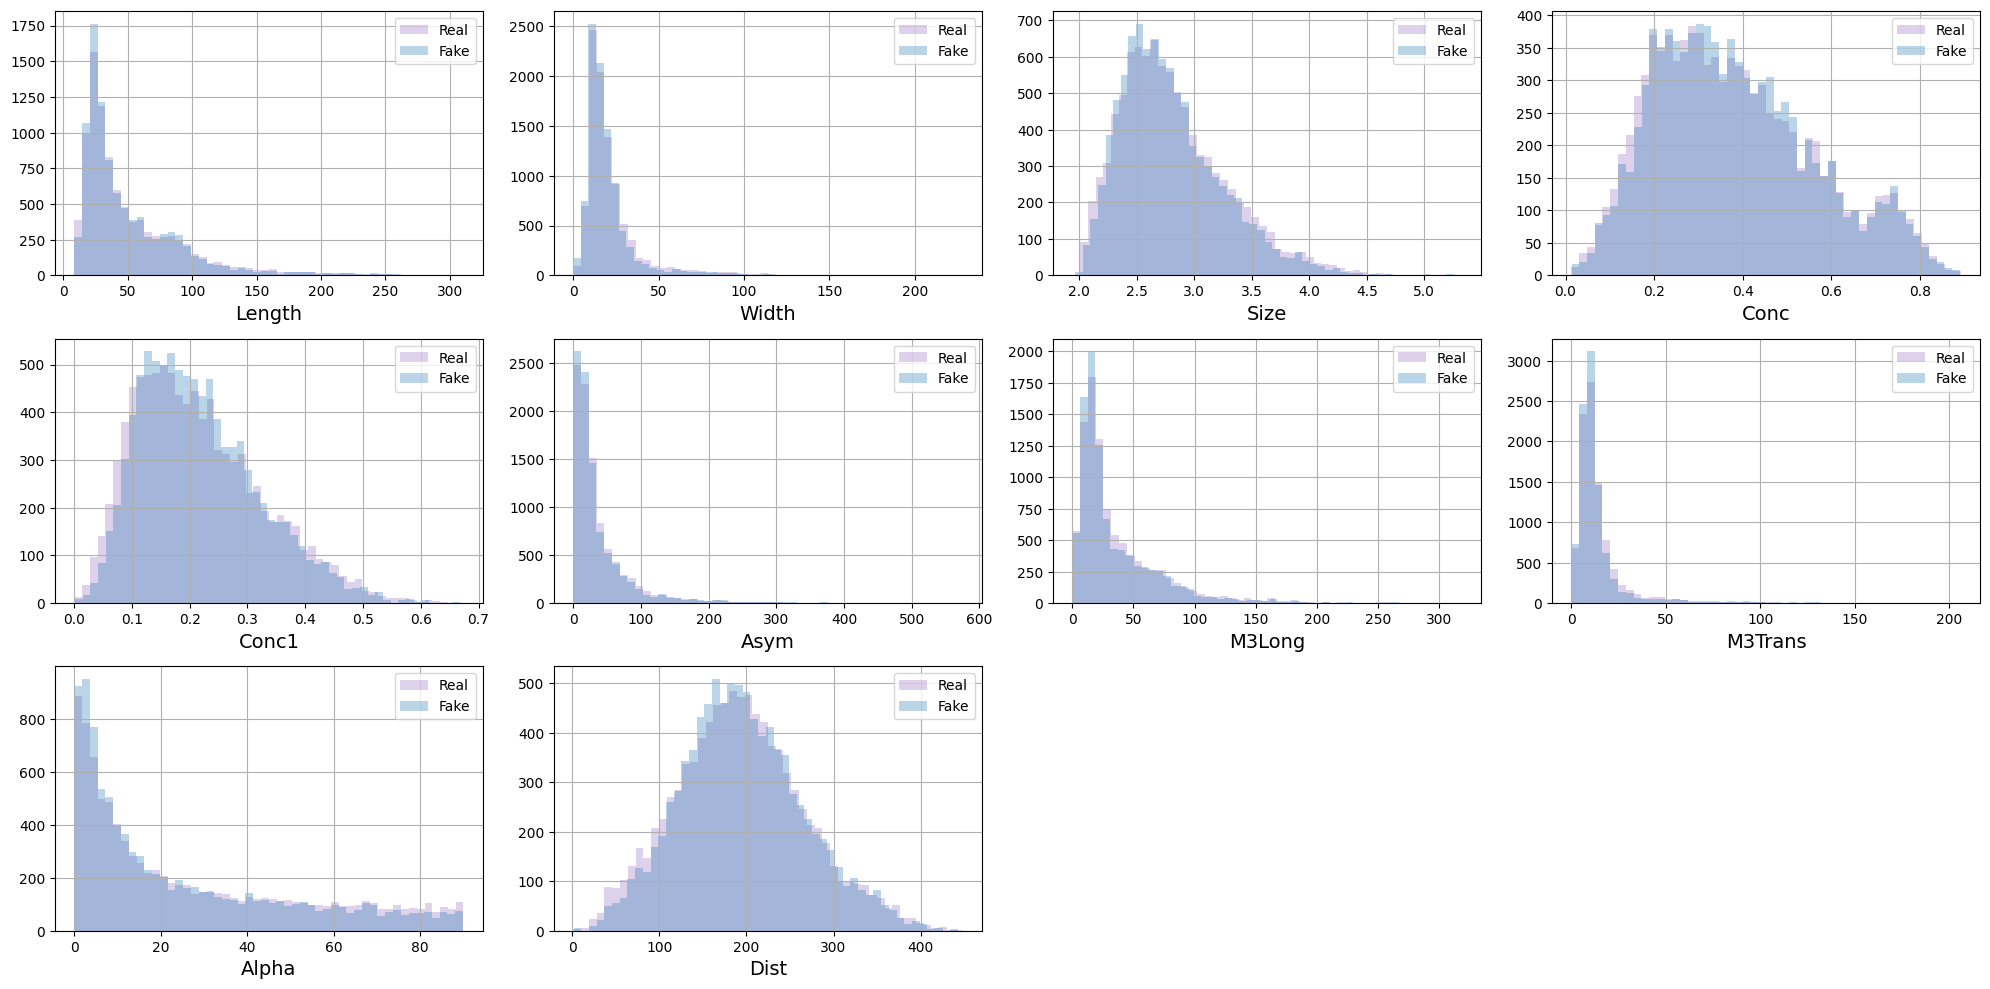

In [ ]:
plot_hists(X_train, X_fake_train, names, label1="Real", label2="Fake", bins=50)

In [ ]:
X_fake_test = generate(fitter.generator, y_train, latent_dim)
X_fake_test = qt.inverse_transform(X_fake_test) # обратное квантильное преобразование сгенерированных данных

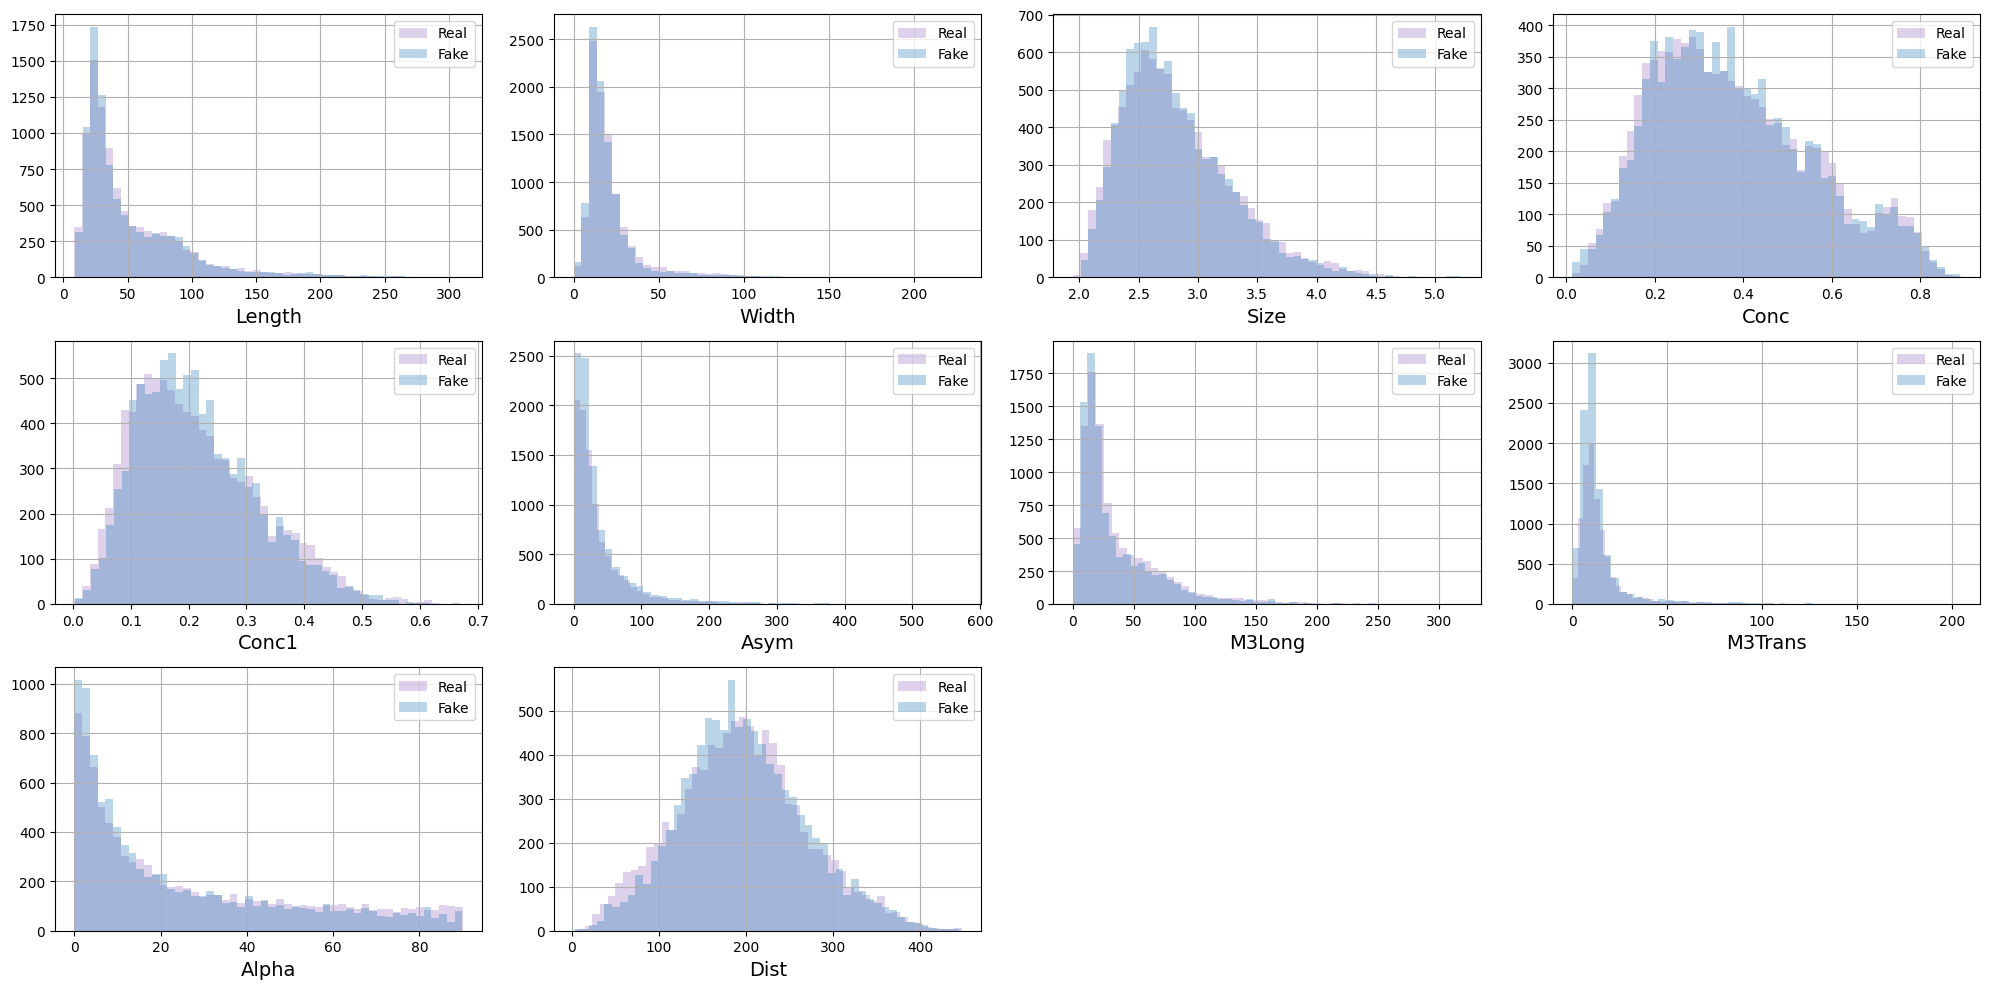

In [ ]:
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake", bins=50)

Визуально видим сходство реальных и фейковых данных. Однако это только проекции 10-мерных объектов на одну ось.

**Измерение качества генерации**

<center><img src="images/clf.png" width="600"></center>

Измерим сходство распределений классификатором.

In [ ]:
# собираем реальные и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis=0)
XX_test = np.concatenate((X_fake_test, X_test), axis=0)

yy_train = np.array([0] * len(X_fake_train) + [1] * len(X_train))
yy_test = np.array([0] * len(X_fake_test) + [1] * len(X_test))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.720833341626115


**Выводы**

ROC-AUC средний (значит не супер хорошо различает фейки и реальные объекты), при этом распределения фейков похожи на распределения реальных объектов, можно сказать о том, что качество генерации неплохое (генератор обучается, все супер!).

Больше всего удовлетворило бы значение ROC-AUC 0.6-0.7 (плохо отличает фейки от реальных объектов, но и не тупой случайный классификатор), что как раз и получилось!

#### Диффузионные модели


**Реализация нейронной сети**

В качестве архитектуры была взята модель генератора:

- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функция активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функция активации;
- Выходной слой.

In [ ]:
class DiffusionGenerator(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(DiffusionGenerator, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(n_inputs, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, n_outputs),
        )

    def forward(self, z, y):
        zy = torch.cat((z, y), dim=1)
        return self.net(zy)

# качество также будем измерять с помощью третьей модели (например, бустинга, которая будет пытаться отличить фейки от реальных объектов)

**Функция для генерации нового объекта с помощью обученной модели**

In [ ]:
from tqdm.auto import tqdm

In [ ]:
def generate_with_diffusion(model, y, latent_dim, sсheduler):
    x = torch.randn(len(y), latent_dim).to(DEVICE)
    y = torch.tensor(y, dtype=torch.float, device=DEVICE)
    for i, t in tqdm(enumerate(sсheduler.timesteps)):
      with torch.no_grad():
        # добавим в х информацию о шаге (добавляю в качестве нового признака х)
        tt = t / 100
        tt = torch.full((x.shape[0], 1), tt).to(DEVICE)
        x_t = torch.cat((x, tt), dim=1).to(DEVICE)
        # сделаем предсказание шума моделью
        residual = model(x_t, y)
      # отнимаем предсказанный шум
      x = sсheduler.step(residual, t, x).prev_sample
    X_fake = x.cpu().numpy()
    return X_fake  # numpy

In [ ]:
# проверка, что функция работает
latent_dim = 10
model = DiffusionGenerator(n_inputs=latent_dim + y.shape[1] + 1, n_outputs=X_train.shape[1]).to(DEVICE)
generate_with_diffusion(model, y_train, latent_dim, noise_scheduler)

0it [00:00, ?it/s]

array([[ 1.0888948 , -5.0738525 , -0.44505224, ..., -3.214282  ,
        -0.12315187, -4.6983256 ],
       [ 1.1875674 ,  1.7465802 , -0.26262504, ..., -1.0271305 ,
        -0.05257916, -0.08632739],
       [ 0.2598422 , -1.4287392 , -3.3630228 , ..., -1.2393738 ,
         2.036928  , -1.4677463 ],
       ...,
       [ 0.23062398,  1.4518213 ,  0.36236095, ..., -1.8982013 ,
         2.7156355 , -0.06041495],
       [-3.0889554 , -2.7463877 , -2.132999  , ..., -5.04137   ,
         0.09868727,  0.8576454 ],
       [ 0.19053715,  0.48024452,  3.661975  , ...,  1.819666  ,
        -6.2520704 , -1.3800061 ]], dtype=float32)

**Реализация класса обучения диффузионной модели и обучение модели**

Реализация функции для зашумления данных

In [ ]:
def corrupt(x, amount):
    noise = torch.rand_like(x)
    amount = amount.view(-1, 1)
    x = x * (1 - amount) + noise * amount
    return x

In [ ]:
# проверка, что функция работает
amount = torch.linspace(0, 1, X_train.shape[0])
noised_x = corrupt(torch.Tensor(X_train), amount)
noised_x.shape

torch.Size([9510, 10])

Добавление sсheduler для обучения модели

In [ ]:
!pip install diffusers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.6 MB/s eta 0:00:00


In [ ]:
from diffusers import DDPMScheduler

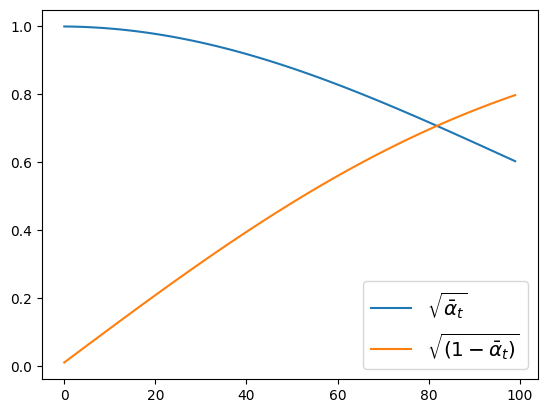

In [ ]:
noise_scheduler = DDPMScheduler(num_train_timesteps=100, clip_sample=False)
plt.plot(
    noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$"
)
plt.plot(
    (1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5,
    label=r"$\sqrt{(1 - \bar{\alpha}_t)}$",
)
plt.legend(fontsize="x-large")

In [ ]:
class DiffusionFitter(object):
    def __init__(
        self,
        model,
        batch_size=32,
        n_epochs=10,
        latent_dim=1,
        lr=0.0001,
    ):

        self.model = model
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr

        self.opt = torch.optim.RMSprop(self.model.parameters(), lr=self.lr)

        self.model.to(DEVICE)
        self.loss = nn.MSELoss()

    def fit(self, X, y):

        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=DEVICE)
        y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)

        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)

        # Turn on training
        self.model.train(True)

        self.loss_history = []

        # Fit Diffusion Model
        for epoch in range(self.n_epochs):
            loss_epoch = 0
            for i, (real_batch, cond_batch) in enumerate(
                DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)
            ):

                # зашумляем батч
                noise = torch.randn_like(real_batch)
                timesteps = torch.randint(0, 99, (real_batch.shape[0],)).long().to(DEVICE)
                noisy_batch = noise_scheduler.add_noise(real_batch, noise, timesteps)

                # добавим в батч информацию об уровне шума каждого объекта
                tt = timesteps / 100
                tt = tt.view(tt.shape[0], 1)
                noisy_batch_t = torch.cat((noisy_batch, tt), dim=1)

                # делаем предсказание шума
                pred_noise = self.model(noisy_batch_t, cond_batch)

                loss = self.loss(pred_noise, noise)
                self.opt.zero_grad()
                loss.backward()
                self.opt.step()

                loss_epoch += loss.item()

            # calculate and store loss after an epoch
            self.loss_history.append(loss_epoch)

            # создание выборки из 1000 объектов из X_train и 1000 сгенерированных объектов и запуск работы функции other_agent_score
            X_fake = generate_with_diffusion(self.model, y[:1000], self.latent_dim, noise_scheduler)
            other_agent_score(X[:1000], y[:1000], X_fake, y[:1000])

        # Turn off training
        self.model.train(False)

**Обучение модели**

In [ ]:
# повторное считывание и преобразование данных (на всякий случай, чтобы наверняка все было чисто)

# read data
names = np.array(
    [
        "Length",
        "Width",
        "Size",
        "Conc",
        "Conc1",
        "Asym",
        "M3Long",
        "M3Trans",
        "Alpha",
        "Dist",
        "class",
    ]
)
data = pd.read_csv("magic04.data", header=None)
data.columns = names
print(data.shape)

# параметры кластеров на изображениях
X = data[names[:-1]].values
X = np.abs(X)

# метки классов
labels = data[names[-1]].values
y = np.ones((len(labels), 1))
y[labels == "h"] = 0

# train / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.5, shuffle=True, random_state=11
)

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(random_state=11, output_distribution='normal')
X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

(19020, 11)


In [ ]:
%%time
latent_dim = 10
model = DiffusionGenerator(n_inputs=latent_dim + y.shape[1] + 1, n_outputs=X_train.shape[1])

diffusionFitter = DiffusionFitter(
    model,
    batch_size=50,
    n_epochs=100,
    latent_dim=latent_dim,
    lr=0.0001,
)
diffusionFitter.fit(X_train, y_train)

0it [00:00, ?it/s]

Linear regression score: 0.596
Boosting score: 0.848


0it [00:00, ?it/s]

Linear regression score: 0.576
Boosting score: 0.81


0it [00:00, ?it/s]

Linear regression score: 0.6
Boosting score: 0.724


0it [00:00, ?it/s]

Linear regression score: 0.566
Boosting score: 0.706


0it [00:00, ?it/s]

Linear regression score: 0.656
Boosting score: 0.708


0it [00:00, ?it/s]

Linear regression score: 0.554
Boosting score: 0.678


0it [00:00, ?it/s]

Linear regression score: 0.62
Boosting score: 0.7


0it [00:00, ?it/s]

Linear regression score: 0.64
Boosting score: 0.708


0it [00:00, ?it/s]

Linear regression score: 0.668
Boosting score: 0.72


0it [00:00, ?it/s]

Linear regression score: 0.606
Boosting score: 0.69


0it [00:00, ?it/s]

Linear regression score: 0.692
Boosting score: 0.732


0it [00:00, ?it/s]

Linear regression score: 0.55
Boosting score: 0.7


0it [00:00, ?it/s]

Linear regression score: 0.726
Boosting score: 0.712


0it [00:00, ?it/s]

Linear regression score: 0.646
Boosting score: 0.668


0it [00:00, ?it/s]

Linear regression score: 0.682
Boosting score: 0.698


0it [00:00, ?it/s]

Linear regression score: 0.632
Boosting score: 0.668


0it [00:00, ?it/s]

Linear regression score: 0.604
Boosting score: 0.668


0it [00:00, ?it/s]

Linear regression score: 0.678
Boosting score: 0.684


0it [00:00, ?it/s]

Linear regression score: 0.614
Boosting score: 0.652


0it [00:00, ?it/s]

Linear regression score: 0.612
Boosting score: 0.69


0it [00:00, ?it/s]

Linear regression score: 0.628
Boosting score: 0.664


0it [00:00, ?it/s]

Linear regression score: 0.664
Boosting score: 0.696


0it [00:00, ?it/s]

Linear regression score: 0.576
Boosting score: 0.628


0it [00:00, ?it/s]

Linear regression score: 0.596
Boosting score: 0.678


0it [00:00, ?it/s]

Linear regression score: 0.522
Boosting score: 0.632


0it [00:00, ?it/s]

Linear regression score: 0.678
Boosting score: 0.684


0it [00:00, ?it/s]

Linear regression score: 0.698
Boosting score: 0.702


0it [00:00, ?it/s]

Linear regression score: 0.542
Boosting score: 0.648


0it [00:00, ?it/s]

Linear regression score: 0.64
Boosting score: 0.658


0it [00:00, ?it/s]

Linear regression score: 0.568
Boosting score: 0.636


0it [00:00, ?it/s]

Linear regression score: 0.686
Boosting score: 0.698


0it [00:00, ?it/s]

Linear regression score: 0.652
Boosting score: 0.672


0it [00:00, ?it/s]

Linear regression score: 0.734
Boosting score: 0.722


0it [00:00, ?it/s]

Linear regression score: 0.62
Boosting score: 0.66


0it [00:00, ?it/s]

Linear regression score: 0.618
Boosting score: 0.642


0it [00:00, ?it/s]

Linear regression score: 0.594
Boosting score: 0.638


0it [00:00, ?it/s]

Linear regression score: 0.652
Boosting score: 0.688


0it [00:00, ?it/s]

Linear regression score: 0.682
Boosting score: 0.648


0it [00:00, ?it/s]

Linear regression score: 0.54
Boosting score: 0.65


0it [00:00, ?it/s]

Linear regression score: 0.612
Boosting score: 0.692


0it [00:00, ?it/s]

Linear regression score: 0.632
Boosting score: 0.714


0it [00:00, ?it/s]

Linear regression score: 0.628
Boosting score: 0.648


0it [00:00, ?it/s]

Linear regression score: 0.586
Boosting score: 0.644


0it [00:00, ?it/s]

Linear regression score: 0.63
Boosting score: 0.664


0it [00:00, ?it/s]

Linear regression score: 0.586
Boosting score: 0.676


0it [00:00, ?it/s]

Linear regression score: 0.642
Boosting score: 0.656


0it [00:00, ?it/s]

Linear regression score: 0.81
Boosting score: 0.772


0it [00:00, ?it/s]

Linear regression score: 0.618
Boosting score: 0.638


0it [00:00, ?it/s]

Linear regression score: 0.622
Boosting score: 0.688


0it [00:00, ?it/s]

Linear regression score: 0.604
Boosting score: 0.684


0it [00:00, ?it/s]

Linear regression score: 0.6
Boosting score: 0.652


0it [00:00, ?it/s]

Linear regression score: 0.668
Boosting score: 0.714


0it [00:00, ?it/s]

Linear regression score: 0.594
Boosting score: 0.634


0it [00:00, ?it/s]

Linear regression score: 0.602
Boosting score: 0.626


0it [00:00, ?it/s]

Linear regression score: 0.644
Boosting score: 0.68


0it [00:00, ?it/s]

Linear regression score: 0.616
Boosting score: 0.652


0it [00:00, ?it/s]

Linear regression score: 0.728
Boosting score: 0.732


0it [00:00, ?it/s]

Linear regression score: 0.764
Boosting score: 0.742


0it [00:00, ?it/s]

Linear regression score: 0.636
Boosting score: 0.626


0it [00:00, ?it/s]

Linear regression score: 0.636
Boosting score: 0.66


0it [00:00, ?it/s]

Linear regression score: 0.748
Boosting score: 0.7


0it [00:00, ?it/s]

Linear regression score: 0.646
Boosting score: 0.656


0it [00:00, ?it/s]

Linear regression score: 0.62
Boosting score: 0.68


0it [00:00, ?it/s]

Linear regression score: 0.648
Boosting score: 0.68


0it [00:00, ?it/s]

Linear regression score: 0.84
Boosting score: 0.822


0it [00:00, ?it/s]

Linear regression score: 0.65
Boosting score: 0.652


0it [00:00, ?it/s]

Linear regression score: 0.662
Boosting score: 0.664


0it [00:00, ?it/s]

Linear regression score: 0.654
Boosting score: 0.686


0it [00:00, ?it/s]

Linear regression score: 0.876
Boosting score: 0.862


0it [00:00, ?it/s]

Linear regression score: 0.59
Boosting score: 0.67


0it [00:00, ?it/s]

Linear regression score: 0.7
Boosting score: 0.682


0it [00:00, ?it/s]

Linear regression score: 0.556
Boosting score: 0.618


0it [00:00, ?it/s]

Linear regression score: 0.702
Boosting score: 0.734


0it [00:00, ?it/s]

Linear regression score: 0.71
Boosting score: 0.734


0it [00:00, ?it/s]

Linear regression score: 0.67
Boosting score: 0.662


0it [00:00, ?it/s]

Linear regression score: 0.652
Boosting score: 0.686


0it [00:00, ?it/s]

Linear regression score: 0.72
Boosting score: 0.722


0it [00:00, ?it/s]

Linear regression score: 0.616
Boosting score: 0.688


0it [00:00, ?it/s]

Linear regression score: 0.664
Boosting score: 0.662


0it [00:00, ?it/s]

Linear regression score: 0.666
Boosting score: 0.68


0it [00:00, ?it/s]

Linear regression score: 0.672
Boosting score: 0.678


0it [00:00, ?it/s]

Linear regression score: 0.65
Boosting score: 0.678


0it [00:00, ?it/s]

Linear regression score: 0.754
Boosting score: 0.724


0it [00:00, ?it/s]

Linear regression score: 0.736
Boosting score: 0.75


0it [00:00, ?it/s]

Linear regression score: 0.672
Boosting score: 0.652


0it [00:00, ?it/s]

Linear regression score: 0.662
Boosting score: 0.714


0it [00:00, ?it/s]

Linear regression score: 0.696
Boosting score: 0.684


0it [00:00, ?it/s]

Linear regression score: 0.7
Boosting score: 0.73


0it [00:00, ?it/s]

Linear regression score: 0.54
Boosting score: 0.658


0it [00:00, ?it/s]

Linear regression score: 0.662
Boosting score: 0.68


0it [00:00, ?it/s]

Linear regression score: 0.698
Boosting score: 0.698


0it [00:00, ?it/s]

Linear regression score: 0.72
Boosting score: 0.678


0it [00:00, ?it/s]

Linear regression score: 0.6
Boosting score: 0.636


0it [00:00, ?it/s]

Linear regression score: 0.688
Boosting score: 0.698


0it [00:00, ?it/s]

Linear regression score: 0.586
Boosting score: 0.646


0it [00:00, ?it/s]

Linear regression score: 0.798
Boosting score: 0.77


0it [00:00, ?it/s]

Linear regression score: 0.588
Boosting score: 0.658


0it [00:00, ?it/s]

Linear regression score: 0.602
Boosting score: 0.632


0it [00:00, ?it/s]

Linear regression score: 0.746
Boosting score: 0.704


0it [00:00, ?it/s]

Linear regression score: 0.59
Boosting score: 0.63
CPU times: user 2min, sys: 11.5 s, total: 2min 11s
Wall time: 2min 3s


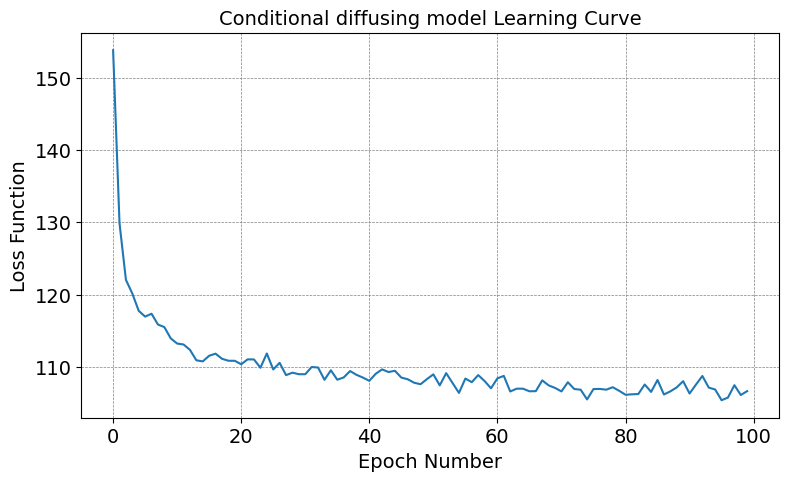

In [ ]:
# diffusion learning curve
plt.figure(figsize=(9, 5))
plt.plot(diffusionFitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional diffusing model Learning Curve", size=14)
plt.grid(visible=1, linestyle="--", linewidth=0.5, color="0.5")
plt.show()

По аналогии с прошлым экспериментом с GAN моделью сгенерируем выборку фейковых объектов, равную размеру тестовой выборки, и обучим градиентный бустинг отличать реальные объекты от фейковых.

In [ ]:
X_train = qt.inverse_transform(X_train)
X_test = qt.inverse_transform(X_test)

In [ ]:
X_fake_train = generate_with_diffusion(diffusionFitter.model, y_train, latent_dim, noise_scheduler)
X_fake_train = qt.inverse_transform(X_fake_train)

0it [00:00, ?it/s]

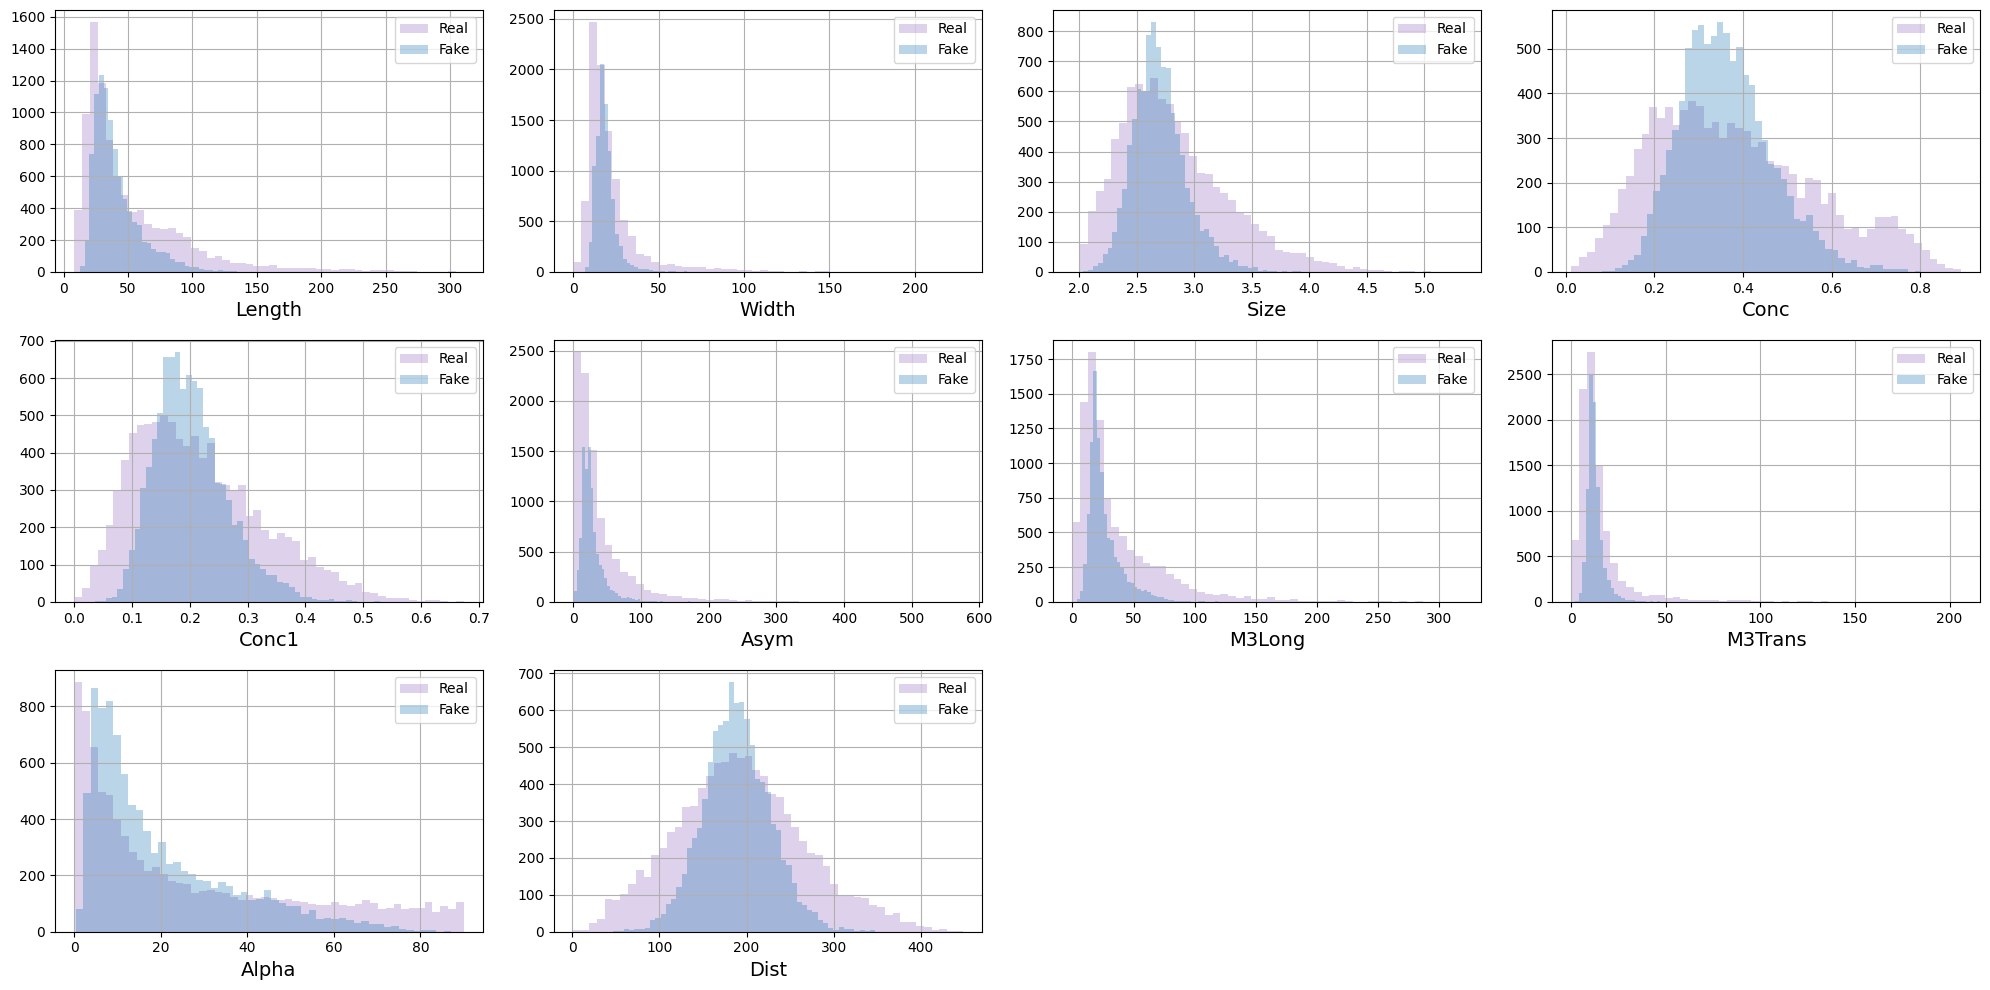

In [ ]:
plot_hists(X_train, X_fake_train, names, label1="Real", label2="Fake", bins=50)

In [ ]:
X_fake_test = generate_with_diffusion(diffusionFitter.model, y_test, latent_dim, noise_scheduler)
X_fake_test = qt.inverse_transform(X_fake_test)

0it [00:00, ?it/s]

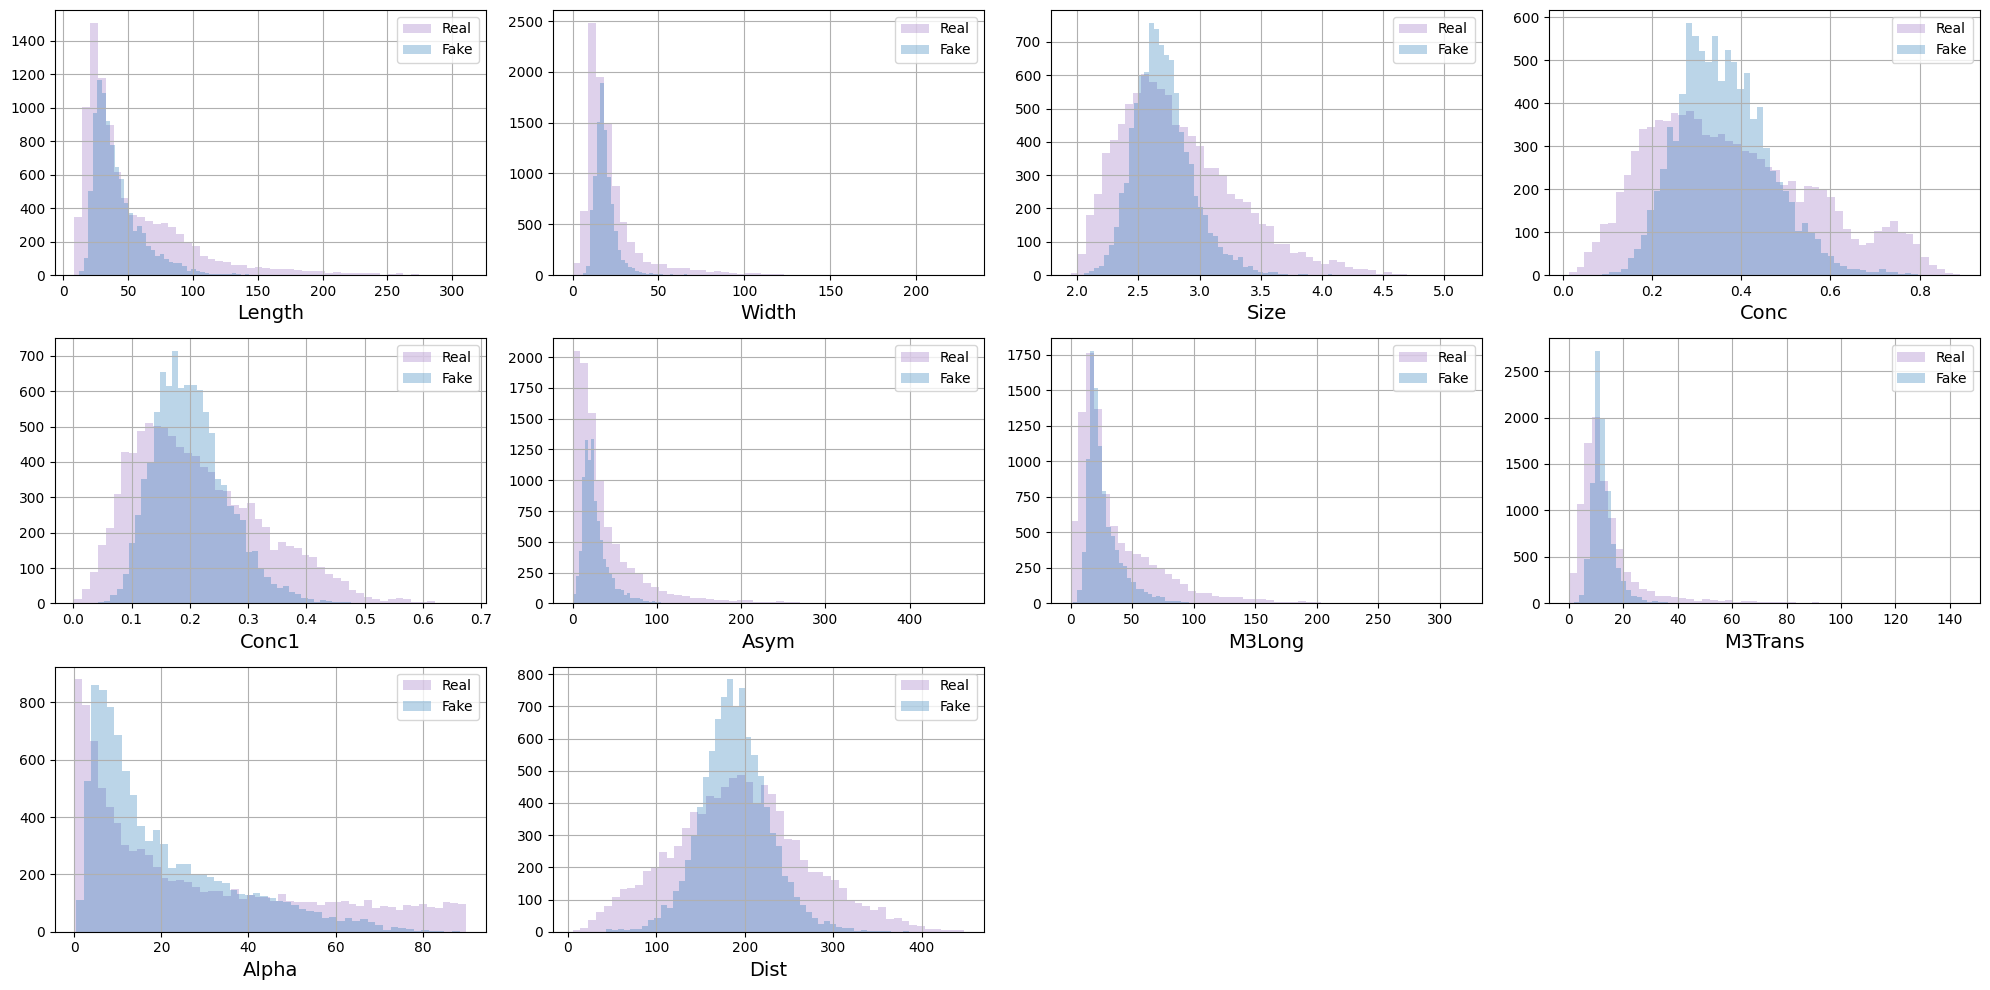

In [ ]:
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake", bins=50)

**Измерение качества генерации**

In [ ]:
# собираем реальные и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis=0)
XX_test = np.concatenate((X_fake_test, X_test), axis=0)

yy_train = np.array([0] * len(X_fake_train) + [1] * len(X_train))
yy_test = np.array([0] * len(X_fake_test) + [1] * len(X_test))

In [ ]:
# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

auc = roc_auc_score(yy_test, yy_test_proba)
acc = accuracy_score(yy_test, clf.predict(XX_test))
print("ROC AUC = ", auc)
print("accuracy score = ", acc)

ROC AUC =  0.9200092823869058
accuracy score =  0.8441640378548896


**Выводы**

Диффузионка отработала явно хуже гана. ROC-AUC больше 0.9, accuracy score - больше 0.8, что говорит о плохой генерации (это же можно увидеть и на графиках распределения, фейковые объекты меньше похожи на реальные, чем в случае с ганом). Значения метрик получились достаточно высокими, хотелось бы, чтобы ROC-AUC был около 0.6-0.7 и accuracy score хотя бы около 0.5-0.6, что говорило бы о том, что классификатор плохо отличает фейки и рилы, а значит генератор хорошо генерирует.